In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


#import tensorflow

from datetime import datetime

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

from sklearn.impute import SimpleImputer

from pyod.models.lof import LOF 
from pyod.models.iforest import IForest
from pyod.models.mad import MAD

In [18]:
with open('/Users/jamisonproctor/Desktop/team_ceres/data/raw/test_array.pkl', 'rb') as f:
    loaded_dict_test = pickle.load(f)

In [19]:
loaded_dict_test.keys()

dict_keys(['test_39', 'test_28', 'test_31', 'test_3', 'test_1', 'test_34', 'test_20', 'test_27', 'test_25', 'test_14', 'test_7', 'test_22', 'test_2', 'test_30', 'test_32', 'test_26', 'test_5', 'test_9', 'test_10', 'test_35', 'test_15', 'test_36', 'test_33', 'test_19', 'test_17', 'test_13', 'test_38', 'test_8', 'test_24', 'test_23', 'test_16', 'test_12', 'test_11', 'test_40', 'test_37', 'test_29', 'test_4', 'test_6', 'test_21', 'test_18'])

In [20]:
loaded_dict_test['test_1'].keys()

Index(['timestamp', 'heart_rate'], dtype='object')

In [25]:
df_test = pd.DataFrame(columns=['user', 'hr', 'hr_mean', 'hr_median', 'hr_std'])
for i, key in enumerate(loaded_dict_test.keys()):
    df_test.loc[i, 'user'] = key
    for j, sub_key in enumerate(loaded_dict_test.keys()):
        df_test.loc[j, 'hr'] = np.array([loaded_dict_test[sub_key]['heart_rate']])
        #df.loc[j, 'steps'] = np.array([loaded_dict[sub_key]['steps']])
        df_test.loc[j, 'hr_mean'] = round(np.mean(df_test['hr'][j]), 2)
        df_test.loc[j, 'hr_median'] = round(np.median(df_test['hr'][j]), 2)
        df_test.loc[j, 'hr_std'] = round(np.std(df_test['hr'][j]), 2)
df_test.drop(['hr'], axis=1, inplace=True)
df_test.head()

,user,hr_mean,hr_median,hr_std
0,test_39,74.56,73.4,10.25
1,test_28,70.28,69.91,7.04
2,test_31,68.59,68.0,7.3
3,test_3,63.34,62.11,7.41
4,test_1,50.95,50.12,4.64


In [22]:
X = df_test.drop(['user'], axis=1)
kmedoids_pipeline = Pipeline([
        ("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')),
        ("scaler", StandardScaler()),
        ("cluster", KMedoids(n_clusters=10))
        ])
clusters = kmedoids_pipeline.fit_predict(X)
df_test['medoid_cluster'] = clusters
print(df_test['medoid_cluster'].value_counts())
df_test['has_model'] = 0

7    8
0    6
9    5
5    4
1    4
6    4
3    3
8    3
4    2
2    1
Name: medoid_cluster, dtype: int64


In [23]:
models = ['AQC0L71', 'AYWIEKR', 'AS2MVDL', 'AUY8KYW', 'AOYM4KG', 'AYEFCWQ', 'AKXN5ZZ', 'A3OU183', 'AAXAA7Z', 'A1K5DRI', 'A7EM0B6', 'AHYIJDV', 'AIFDJZB', 'AURCTAK', 'AV2GF3B', 'A4E0D03', 'AJWW3IY', 'A4G0044', 'APGIB2T', 'AMV7EQF', 'AA2KP1S', 'AX6281V', 'A0VFT1N', 'ASFODQR', 'A0NVTRV']
for row in df_test.index:
    if df_test['user'].loc[row] in models:
        df_test['has_model'][row] = 1

<AxesSubplot:xlabel='hr_mean', ylabel='hr_std'>

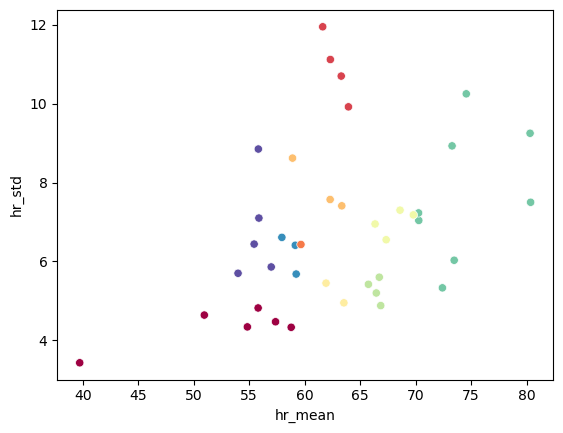

In [24]:
sns.scatterplot(x=df_test['hr_mean'], y=df_test['hr_std'], hue=df_test['medoid_cluster'], palette="Spectral", legend=False)

In [11]:
sns.scatterplot(x=df['hr_mean'], y=df['st_mean'], hue=df['has_model'], color = 'r')

KeyError: 'st_mean'